# Analysis of Superstore Dataset

## Introduction
This notebook aims to analyze the Superstore dataset to identify weak areas and derive business problems. The goal is to improve overall profitability by addressing these issues.

## 1. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
retail = pd.read_csv('data/SampleSuperstore.csv')
# geolocation = pd.read_csv('data/zip-code_geolocation.csv')

In [3]:
# Display the first few rows
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 2. Data Cleaning

**Removing Redundant Columns and Duplicate Rows**:

The 'Country' column contains only a single value, 'USA', so it is removed from the dataset. Additionally, 17 duplicate rows are removed.

**Manipulating 'Postal Code' Column**:

The 'Postal Code' column is converted from an integer to a string. To ensure all zip codes have 5 digits, leading zeros are added where necessary.

In [4]:
retail = (retail.drop('Country', axis=1)
          .drop_duplicates())

retail['Postal Code'] = (retail['Postal Code'].astype(str)
                         .str.zfill(5))

retail['Profit Margin'] = retail['Profit'] / retail['Sales']

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "simple_white"
subcategory_profit = retail.groupby("Sub-Category")["Profit"].agg(["sum", "mean"]).reset_index()

def create_bar(df="data", x1='x1', x2='x2', y='y', plot1_title='', plot2_title=''):

    first_plot = go.Bar(x=df[x1], y=df[y],
                        showlegend=False,
                        orientation='h', opacity=0.7,
                        name='Total Profit')

    second_plot = go.Bar(x=df[x2],
                        y=df[y],
                        orientation='h', opacity=0.7,
                        showlegend=False, name ='Average Profit')
                        
    fig = make_subplots(rows=1, cols=2, print_grid=False,
                        x_title='Amount ($)', subplot_titles=[plot1_title, plot2_title])
                        
    fig.add_trace(first_plot, row=1, col=1)
    fig.add_trace(second_plot, row=1, col=2)
    fig.show()

create_bar(df=subcategory_profit, y='Sub-Category', x1='sum', x2='mean',
           plot1_title='Total Profit by Category', plot2_title='Average Profit by Category')

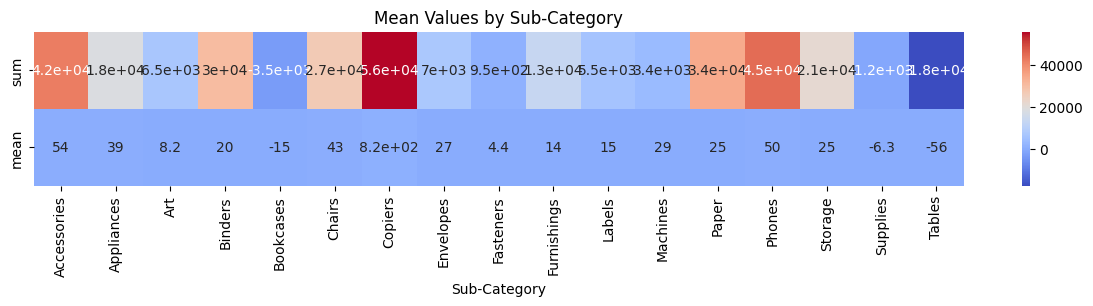

In [19]:
# print(subcategory_profit[["Sub-Category", "mean"]].round(2))
subcategory_profit = retail.groupby("Sub-Category")["Profit"].agg(["sum", "mean"]).reset_index()#.sort_values(by="mean", ascending=False)

heatmap_data = subcategory_profit.set_index('Sub-Category').T

# Plotting the heatmap
plt.figure(figsize=(15, 2))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mean Values by Sub-Category')
plt.show()

## 2. Exploratory Data Analysis (EDA)

### Dataset Overview

In [124]:
# Check for missing values and data types
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9977 non-null   object 
 1   Segment        9977 non-null   object 
 2   City           9977 non-null   object 
 3   State          9977 non-null   object 
 4   Postal Code    9977 non-null   object 
 5   Region         9977 non-null   object 
 6   Category       9977 non-null   object 
 7   Sub-Category   9977 non-null   object 
 8   Sales          9977 non-null   float64
 9   Quantity       9977 non-null   int64  
 10  Discount       9977 non-null   float64
 11  Profit         9977 non-null   float64
 12  Profit Margin  9977 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [125]:
# Summary statistics
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.9700,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.0000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.2000,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.3720,8399.976
Profit Margin,9977.0,0.120114,0.466638,-2.750,0.0750,0.270,0.3625,0.500


### Distribution of Key Categorical Features

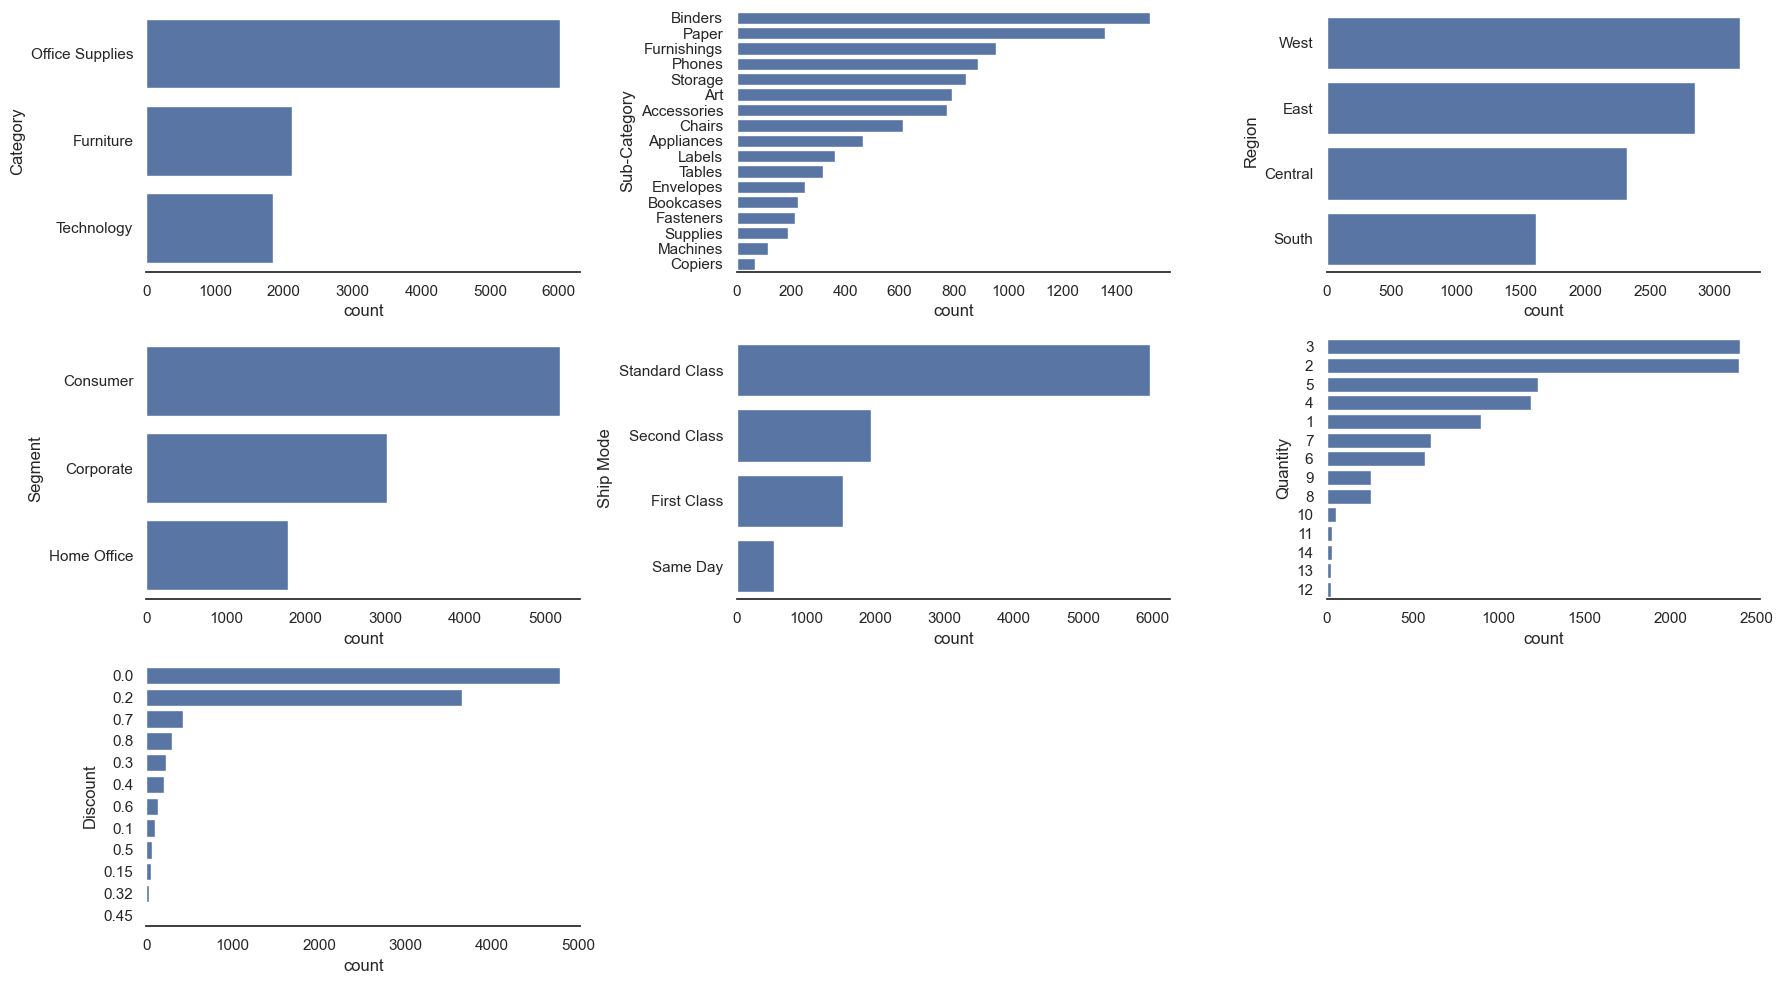

In [126]:
columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode', 'Quantity', 'Discount']

num_rows, num_cols = 3, 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 10))

# Flatten the axes array to iterate over features
axes = axes.flatten()

for i, feature in enumerate(columns):
    ax = axes[i]

    # Compute the counts of each category and sort them
    category_counts = retail[feature].value_counts().sort_values(ascending=False)

    # Get the sorted order of categories
    sorted_categories = category_counts.index
    # Plot the 
    sns.countplot(data=retail, y=feature, ax=ax, order=sorted_categories)
    
    ax.grid(False)
    sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

# Hide empty subplots
empty_plots = [7, 8]

for ax in empty_plots:
    fig.delaxes(axes[ax])

plt.tight_layout()
plt.show()

### Distribution of key Numerical Features
I have visualized the distributions of 'Sales' and 'Profit' using a logarithmic scale. This adjustment is particularly beneficial because both columns span several orders of magnitude. Employing a logarithmic scale enhances visibility, allowing for clearer interpretation of the data distributions.

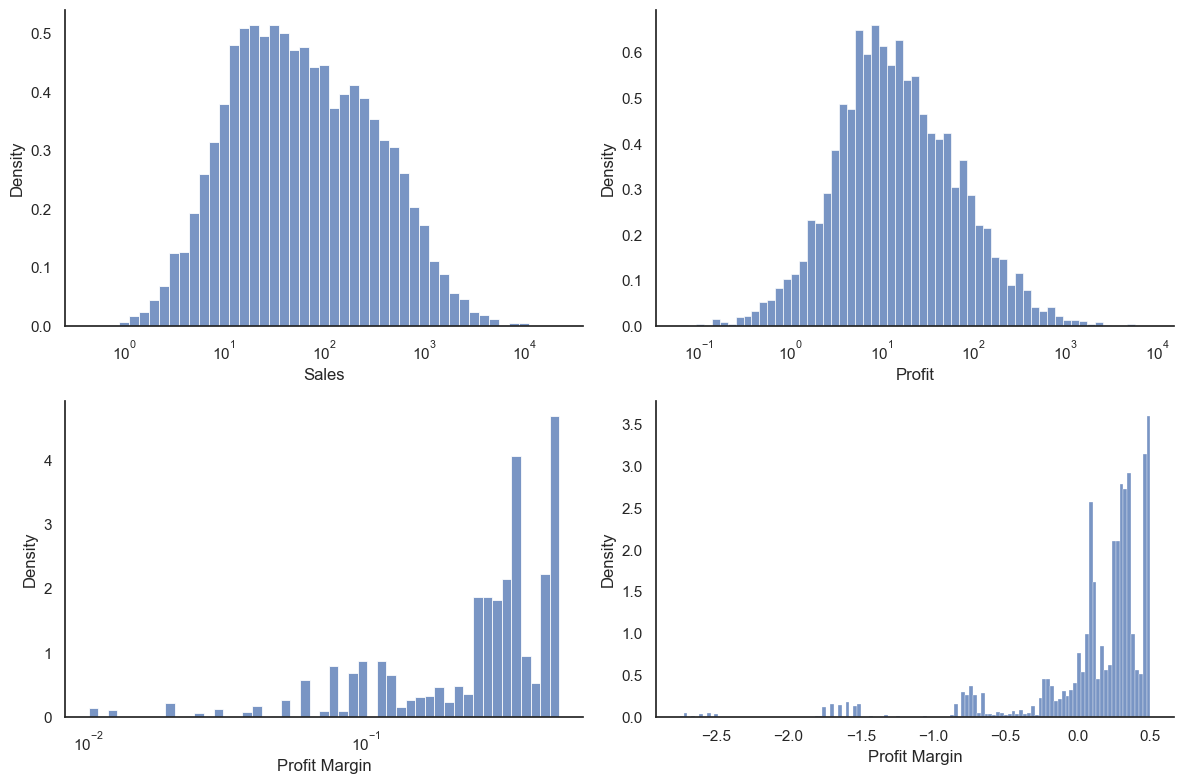

In [132]:
columns = ['Sales', 'Profit', 'Profit Margin']

num_rows, num_cols = 2, 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 8))

# Flatten the axes array to iterate over features
axes = axes.flatten()

for i, feature in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=retail, x=feature, ax=ax, stat='density', common_norm=False, log_scale=True)
    
    ax.grid(False)
    sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)

sns.histplot(data=retail, x='Profit Margin', ax=axes[3], stat='density', common_norm=False, log_scale=False)
sns.despine(ax=axes[3], left=False, right=True, top=True, bottom=False)

plt.tight_layout()
plt.show()

## 3. Profitability Analysis
### Profitability by Category
**Insight**:
Among the categories, "Furniture" and "Office Supplies" exhibit lower average profits, with mean profits of $8.70 and $20.35, respectively. In contrast, the "Technology" category stands out with a notably higher mean profit of $78.75.

Distribution of Average Profit & Average Profit Margin by Category:
           Category  Profit  Profit Margin
0        Furniture    8.70           0.04
1  Office Supplies   20.35           0.14
2       Technology   78.75           0.16


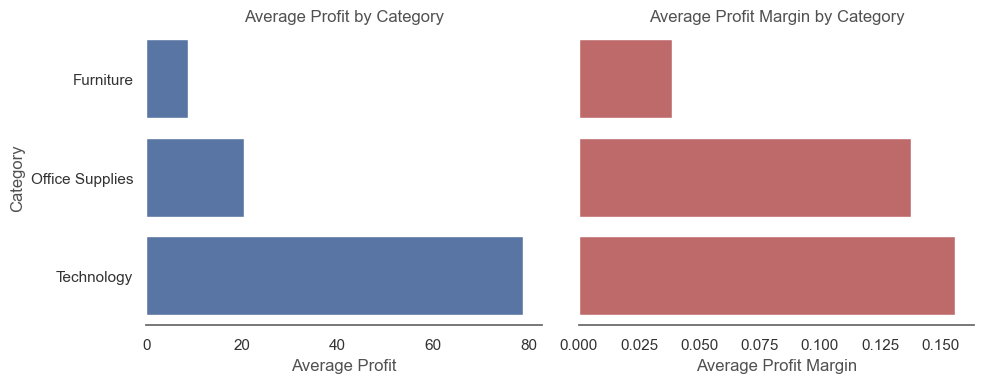

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average profit and average profit margin for each category
category_stats = retail.groupby('Category').agg({'Profit': 'mean', 'Profit Margin': 'mean'}).reset_index()
print(f'Distribution of Average Profit & Average Profit Margin by Category:\n {category_stats.round(2)}')

# Plotting
num_rows, num_cols = 1, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4))

# Plot bar plots for average profit and average profit margin side by side
sns.barplot(data=category_stats, y='Category', x='Profit', ax=axes[0])
sns.barplot(data=category_stats, y='Category', x='Profit Margin', color='indianred', ax=axes[1])

# Customize plot appearance
for ax in axes:
    ax.grid(False)
    sns.despine(left=True, right=True, top=True, bottom=False)

axes[1].set_yticks([])

# Set titles and labels for each subplot
axes[0].set_title('Average Profit by Category', alpha=0.8)
axes[0].set_xlabel('Average Profit', alpha=0.8)
axes[0].set_ylabel('Category', alpha=0.8)
axes[1].set_title('Average Profit Margin by Category', alpha=0.8)
axes[1].set_xlabel('Average Profit Margin', alpha=0.8)
axes[1].set_ylabel(None)

# Adjust tick label alpha and spine transparency
for ax in axes:
    ax.tick_params(axis='both', labelcolor=('black', 0.8))
    for spine in ax.spines.values():
        spine.set_alpha(0.7)

plt.tight_layout()

plt.show()

### Profitability by Sub-Category

In [250]:
# Compute average profit and average profit margin for each category
subcategory_stats = retail.groupby('Sub-Category').agg({'Profit': 'mean', 'Profit Margin': 'mean'}).reset_index()
print(f'Distribution of Average Profit & Average Profit Margin by Category:\n {subcategory_stats.round(2)}')



Distribution of Average Profit & Average Profit Margin by Category:
    Sub-Category  Profit  Profit Margin
0   Accessories   54.11           0.22
1    Appliances   38.92          -0.16
2           Art    8.21           0.25
3       Binders   19.86          -0.20
4     Bookcases  -15.23          -0.13
5        Chairs   43.20           0.04
6       Copiers  817.91           0.32
7     Envelopes   27.42           0.42
8     Fasteners    4.38           0.30
9   Furnishings   13.65           0.14
10       Labels   15.22           0.43
11     Machines   29.43          -0.07
12        Paper   24.98           0.43
13       Phones   50.07           0.12
14      Storage   25.15           0.09
15     Supplies   -6.26           0.11
16       Tables  -55.57          -0.15


Distribution of Profit (total & average) by Sub-Category:

   Sub-Category     sum  mean
0   Accessories  169.11  0.22
1    Appliances  -73.10 -0.16
2           Art  200.04  0.25
3       Binders -302.23 -0.20
4     Bookcases  -28.87 -0.13
5        Chairs   27.04  0.04
6       Copiers   21.57  0.32
7     Envelopes  107.48  0.42
8     Fasteners   64.92  0.30
9   Furnishings  130.88  0.14
10       Labels  155.92  0.43
11     Machines   -8.28 -0.07
12        Paper  578.36  0.43
13       Phones  105.99  0.12
14      Storage   75.39  0.09
15     Supplies   21.29  0.11
16       Tables  -47.12 -0.15


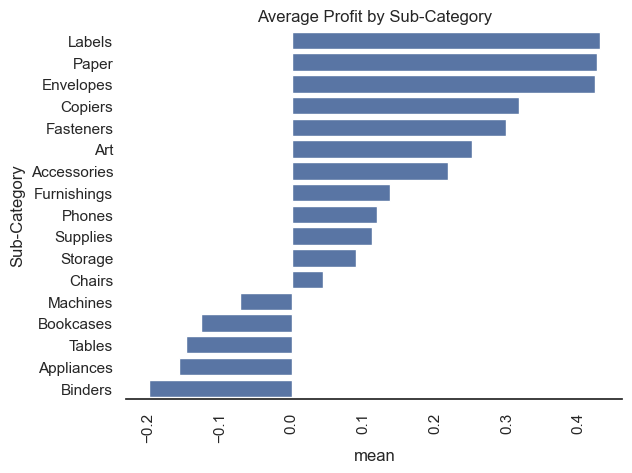

In [136]:
# Total and average profit by Sub-Category
subcategory_profit = retail.groupby('Sub-Category')['Profit Margin'].agg(['sum', 'mean']).reset_index()
subcategory_profit_sorted = subcategory_profit.sort_values(by='mean', ascending=False)

print('Distribution of Profit (total & average) by Sub-Category:\n')
print(subcategory_profit.round(2))

# Visualize profit distribution by Sub-Category
sns.barplot(data=subcategory_profit_sorted, y='Sub-Category', x='mean')

plt.grid(False)
sns.despine(left=True, right=True, top=True, bottom=False)

plt.title('Average Profit by Sub-Category')
plt.xticks(rotation=90)
plt.show()

## 4. Discount Analysis
### Impact of Discount on Profit

In [24]:
# Correlation between Discount and Profit
discount_profit_corr = retail['Discount'].corr(retail['Profit'])
print(f"Correlation between Discount & Profit is {discount_profit_corr}\n")

# Average discount by Category
category_discount = retail.groupby('Category')['Discount'].mean().reset_index()
print('Distribution of average discount by category:')
category_discount

Correlation between Discount & Profit is -0.21966206449082398

Distribution of average discount by category:


,Category,Discount
0,Furniture,0.174027
1,Office Supplies,0.157385
2,Technology,0.132323


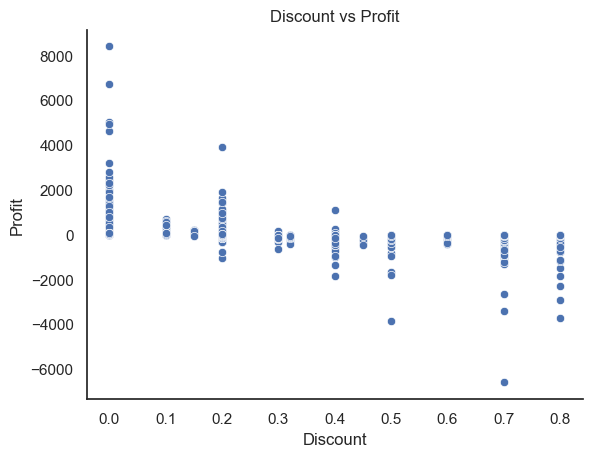

In [25]:
# Visualize relationship between Discount and Profit
sns.scatterplot(data=retail, x='Discount', y='Profit')
sns.despine(left=False, right=True, top=True, bottom=False)
plt.title('Discount vs Profit')
plt.show()

## 5. Regional Analysis
### Profitability by Region

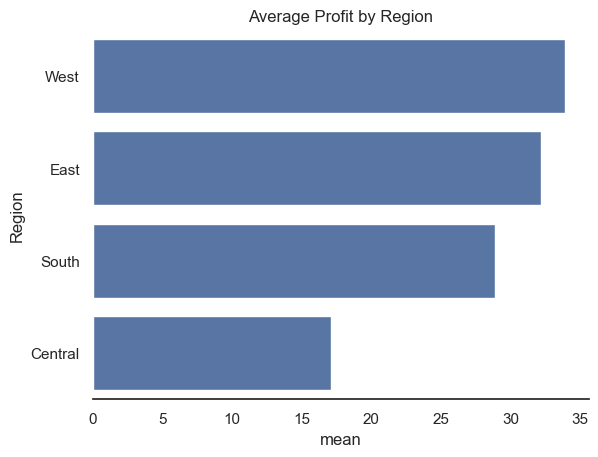

In [26]:
# Total and average profit by Region
region_profit = retail.groupby('Region')['Profit'].agg(['sum', 'mean']).reset_index()
region_profit_sorted = region_profit.sort_values(by='mean', ascending=False)

# Visualize profit distribution by Region
sns.barplot(data=region_profit_sorted, y='Region', x='mean')
sns.despine(left=True, right=True, top=True, bottom=False)
plt.title('Average Profit by Region')
plt.show()

### State and City analysis

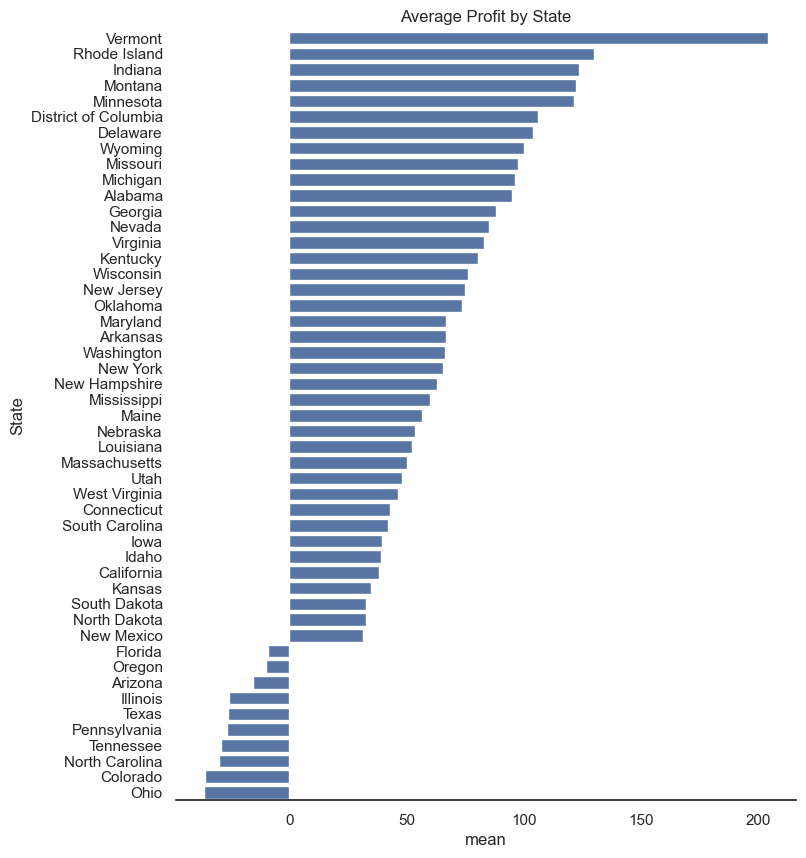

In [101]:
# Total and average profit by State
state_profit = retail.groupby('State')['Profit'].agg(['sum', 'mean']).reset_index()
state_profit_sorted = state_profit.sort_values(by='mean', ascending=False)

# Visualize profit distribution by State
plt.figure(figsize=(8, 10))
axes = sns.barplot(data=state_profit_sorted, y='State', x='mean')
sns.despine(left=True, right=True, top=True, bottom=False)

plt.title('Average Profit by State')
plt.show()

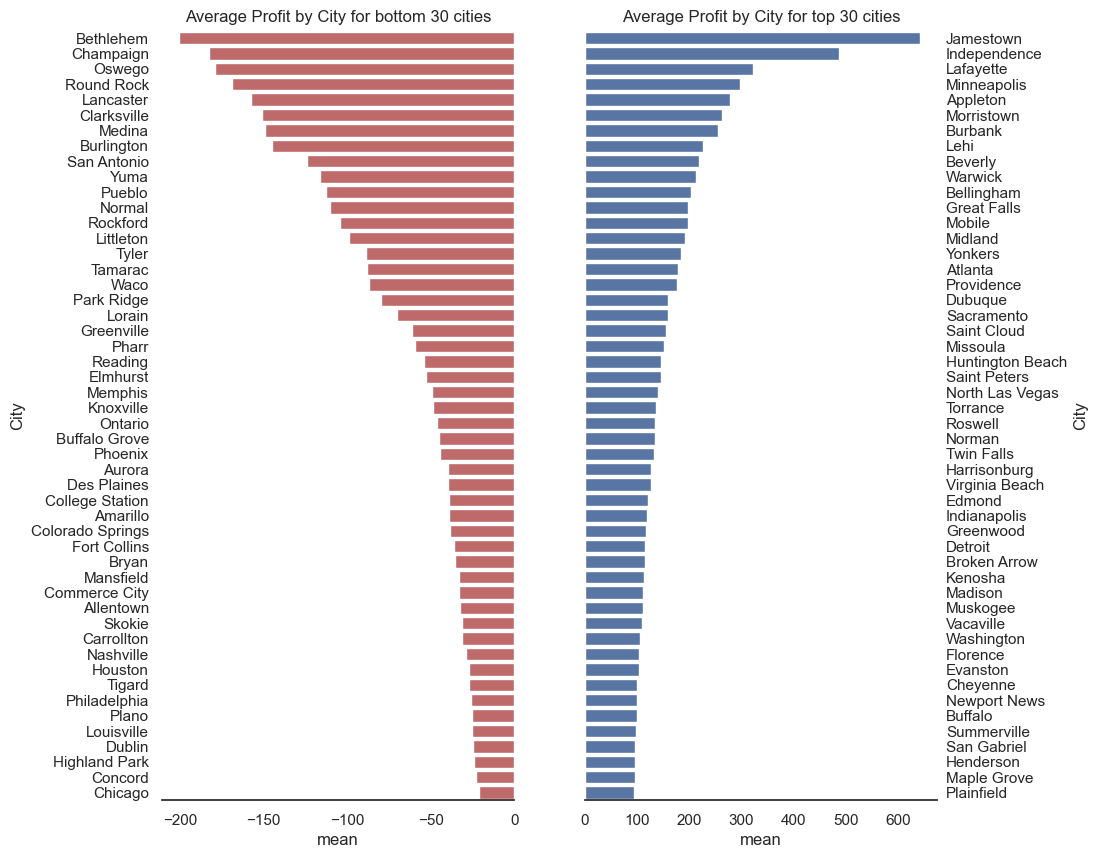

In [104]:
# Total and average profit by City
city_profit = retail.groupby('City')['Profit'].agg(['sum', 'mean']).reset_index()
bottom_city_profit = city_profit.sort_values(by='mean').iloc[:50, :]
top_city_profit = city_profit.sort_values(by='mean', ascending=False).iloc[:50, :]

# Visualize profit distribution by City
num_rows, num_cols = 1, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 10))
sns.barplot(data=bottom_city_profit, y='City', x='mean', ax=axes[0], color='indianred')
sns.barplot(data=top_city_profit, y='City', x='mean', ax=axes[1])

# Move y-labels to the right side of the plot for the top cities subplot
axes[1].tick_params(axis='y', direction='inout', labelleft=False, labelright=True)

sns.despine(left=True, right=True, top=True, bottom=False)

# Add the y-label on the right side for the top cities subplot
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel('City')

# Set titles for each subplot
axes[0].set_title('Average Profit by City for bottom 30 cities')
axes[1].set_title('Average Profit by City for top 30 cities')

plt.show()

## 6. Segment Analysis
### Profitability by Segment

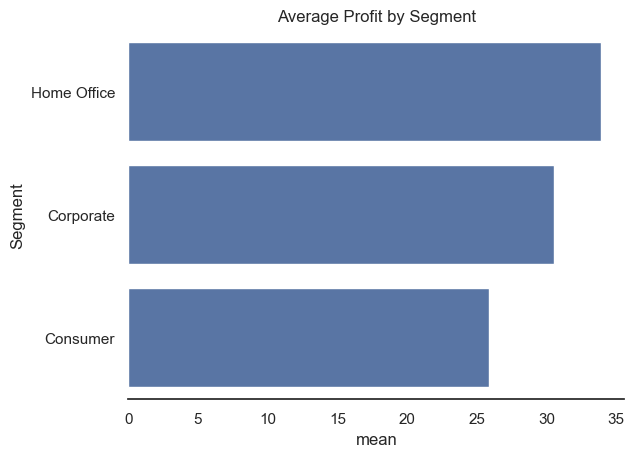

In [113]:
# Total and average profit by Segment
segment_profit = retail.groupby('Segment')['Profit'].agg(['sum', 'mean']).reset_index()
segment_profit_sorted = segment_profit.sort_values(by='mean', ascending=False)

# Visualize profit distribution by Segment
sns.barplot(data=segment_profit_sorted, y='Segment', x='mean')
sns.despine(left=True, right=True, top=True, bottom=False)
plt.title('Average Profit by Segment')
plt.show()

## 7. Ship Mode Analysis
### Profitability by Ship Mode

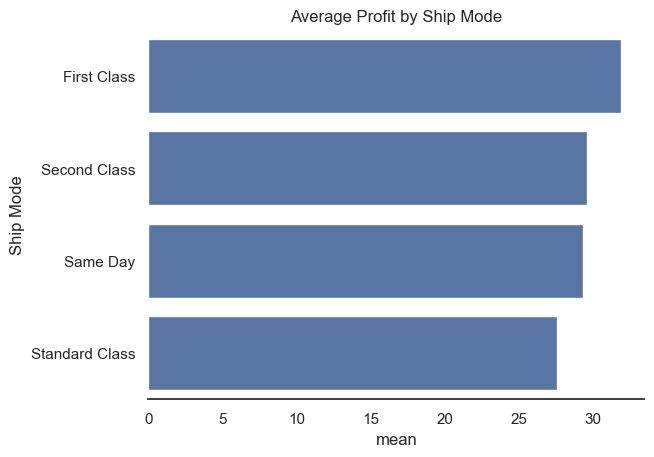

In [114]:
# Total and average profit by Ship Mode
shipmode_profit = retail.groupby('Ship Mode')['Profit'].agg(['sum', 'mean']).reset_index()
shipmode_profit_sorted = shipmode_profit.sort_values(by='mean', ascending=False)

# Visualize profit distribution by Ship Mode
sns.barplot(data=shipmode_profit_sorted, y='Ship Mode', x='mean')
sns.despine(left=True, right=True, top=True, bottom=False)
plt.title('Average Profit by Ship Mode')
plt.show()

## Summary and Recommendations
Based on the analysis, the following key findings and recommendations are made:

- **High Discounts Leading to Low Profits**: Categories like X and Y have high discounts and low profits. It is recommended to re-evaluate the discount strategy for these categories.
- **Unprofitable Categories and Sub-Categories**: Sub-categories such as A, B, and C are consistently unprofitable. Consider discontinuing these products or finding ways to reduce costs.
- **Regional Disparities in Profit**: Regions such as M and N have lower average profits. Investigate local market conditions and develop targeted strategies for these areas.
- **Segment Profitability Issues**: The Home Office segment has lower average profits. Tailor marketing efforts to better address the needs of this segment.
- **Shipping Cost Impact**: Same Day shipping is less profitable. Optimize shipping strategies by promoting more cost-effective options.

In [9]:
import folium
from geopy.geocoders import Nominatim

df = retail.groupby('Postal Code').agg({'Sales': 'sum'}).reset_index()

# Initialize a geocoder
# geolocator = Nominatim(user_agent="sales_visualization") 

# def geocode_postal_code(zips):
#     locations = [geolocator.geocode(f"{zip}, USA", addressdetails=True) for zip in zips]
#     if locations:
#         # Extract latitude and longitude from location objects
#         latitude = [location.latitude for location in locations]
#         longitude = [location.longitude for location in locations]
#         return latitude, longitude
#     else:
#         return None, None

# # Geocode postal codes and add latitude and longitude columns to DataFrame
# df['Latitude'], df['Longitude'] = geocode_postal_code(df['Postal Code'])

In [10]:
# Create a Folium map centered at the mean latitude and longitude
# map_sales = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# # # Define color scheme for each sales category
# color_scheme = {
#     'Low': 'blue',
#     'Medium-Low': 'green',
#     'Medium-High': 'orange',
#     'High': 'red'
# }


# # Add markers for each aggregated sales location with different colors for each category
# for lat, lon, postal_code, sales, category in zip(df['Latitude'], df['Longitude'], df['Postal Code'], df['Sales'], df['Sales Category']):
#     color = color_scheme.get(category, 'gray')  # Default to gray if category not found in color scheme
#     folium.Marker([lat, lon], popup=f"Postal Code: {postal_code}, Total Sales: ${sales}", icon=folium.Icon(color=color)).add_to(map_sales)

# # Display the map
# map_sales.save('sales_map.html')

In [10]:
# df = pd.merge(df, geolocation, on='Postal Code')

In [ ]:
# bin_edges = [-float('inf'), 270.13, 1043.03, 3215.14, float('inf')]
# bin_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
# df['Sales Category'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels)

In [11]:
# df1 = pd.merge(retail, df, on='Postal Code')
# df1.head()

In [12]:
retail.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
sns.set_style("white")
df = retail.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# sns.barplot(data=retail, x='Sub-Category', y='Profit',
#             log_scale=False, hue='Sub-Category',
#             errorbar=('ci', False), order=position_order);
# plt.xticks(rotation=70);


range(0, 17)

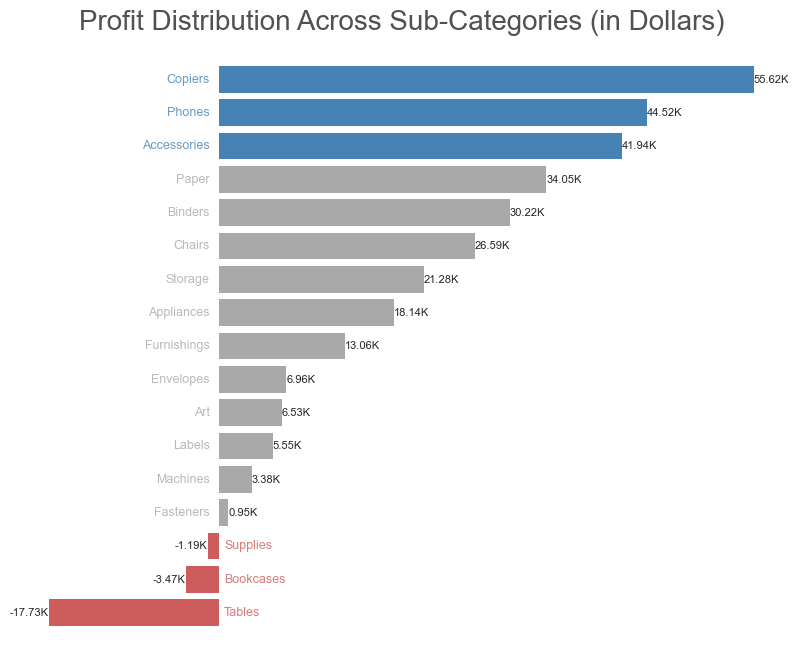

In [12]:
df = retail.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
sequence = range(len(df))
pos = list(sequence)

bars = plt.barh(pos, df, align='center', color='darkgrey', linewidth=0)

for i, bar in enumerate(bars):
    width = bar.get_width()
    width = width / 1000
    text = str(float(width.round(2))) + "K"
    height = bar.get_y() + bar.get_height() / 2
    width = bar.get_width()

    if i < 3:
        bar.set_color('indianred')
        plt.text(width, height, text, ha='right', va='center', fontsize=8)
        plt.text(500, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='left',
             fontsize=9, color='indianred', alpha=0.8)
    elif i > 13:
        bar.set_color('steelblue')
        plt.text(width, height, text, ha='left', va='center', fontsize=8)
        plt.text(-1000, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='right',
             fontsize=9, color='steelblue', alpha=0.8)
    if i in range(3, 14):
        plt.text(width, height, text, ha='left', va='center', fontsize=8)
        plt.text(-1000, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='right',
             fontsize=9, alpha=0.8, color='darkgrey')

    
plt.yticks(pos, df.index, alpha=0.8);

for spine in plt.gca().spines.values():
    spine.set_visible(False);

plt.xticks([])
plt.yticks([])

plt.title('Profit Distribution Across Sub-Categories (in Dollars)', alpha=0.8, fontsize=20)
plt.show()

In [23]:
retail.groupby(['Sub-Category']).agg({'Discount': 'mean', 'Profit': 'mean'}).sort_values(by='Profit', ascending=False)

,Discount,Profit
Sub-Category,,
Copiers,0.161765,817.909190
Accessories,0.078452,54.111788
Phones,0.154556,50.073938
Chairs,0.170178,43.095894
Appliances,0.166524,38.922758
Machines,0.306087,29.432669
Envelopes,0.080315,27.418019
Storage,0.074704,25.152277
Paper,0.074891,24.856620


In [12]:
# retail.groupby('State').agg({'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

In [44]:
retail['Revenue'] = retail['Sales']  * retail['Quantity']
retail['Cost'] = retail['Revenue']  - retail['Profit']
retail['Profit Margin'] = retail['Profit'] / retail['Revenue']
retail['Discounted SP'] = retail['Sales'] * (1 - retail['Discount'])
retail['Avg SP'] = retail['Sales'] / retail['Quantity']
retail['Discounted Avg SP'] = retail['Discounted SP'] / retail['Quantity']
retail['Margin Per Unit'] = retail['Profit'] / retail['Quantity']

In [45]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Revenue,Cost,Profit Margin,Discounted SP,Avg SP,Discounted Avg SP,Margin Per Unit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.9200,482.0064,0.08000,261.960000,130.9800,130.980000,20.9568
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.8200,1976.2380,0.10000,731.940000,243.9800,243.980000,73.1940
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.2400,22.3686,0.23500,14.620000,7.3100,7.310000,3.4357
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,4787.8875,5170.9185,-0.08000,526.667625,191.5155,105.333525,-76.6062
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,44.7360,42.2196,0.05625,17.894400,11.1840,8.947200,1.2582
